In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [60]:
df = pd.read_csv(r'D:\Data Science\ML\student_habits_performance.csv')

In [28]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [5]:
df.isnull().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [6]:
df['parental_education_level'].value_counts()

parental_education_level
High School    392
Bachelor       350
Master         167
Name: count, dtype: int64

In [7]:
df = df.dropna()

In [8]:
df['parental_education_level'].size

909

In [9]:
df.shape

(909, 16)

In [10]:
df.nunique()

student_id                       909
age                                8
gender                             3
study_hours_per_day               76
social_media_hours                59
netflix_hours                     49
part_time_job                      2
attendance_percentage            316
sleep_hours                       67
diet_quality                       3
exercise_frequency                 7
parental_education_level           3
internet_quality                   3
mental_health_rating              10
extracurricular_participation      2
exam_score                       453
dtype: int64

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,909.0,20.475248,2.302721,17.0,18.0,20.0,22.0,24.0
study_hours_per_day,909.0,3.538724,1.469730,0.0,2.5,3.5,4.5,8.3
social_media_hours,909.0,2.504620,1.164802,0.0,1.7,2.5,3.3,7.2
netflix_hours,909.0,1.830363,1.071251,0.0,1.0,1.8,2.6,5.4
attendance_percentage,909.0,83.880308,9.453622,56.0,77.5,84.2,90.7,100.0
sleep_hours,909.0,6.474037,1.218943,3.2,5.6,6.5,7.3,10.0
exercise_frequency,909.0,3.051705,2.035632,0.0,1.0,3.0,5.0,6.0
mental_health_rating,909.0,5.466447,2.857525,1.0,3.0,5.0,8.0,10.0
exam_score,909.0,69.558196,16.929436,18.4,58.4,70.4,81.3,100.0


# Feature Creation

In [12]:
cate_col = df.select_dtypes(['object', 'category']).columns
num_col = df.select_dtypes(['int', 'float']).columns

In [13]:
df['total_screen_time'] = df['social_media_hours'] + df['netflix_hours']
pd.DataFrame(df[['total_screen_time', 'social_media_hours', 'netflix_hours']])

,total_screen_time,social_media_hours,netflix_hours
0,2.3,1.2,1.1
1,5.1,2.8,2.3
2,4.4,3.1,1.3
3,4.9,3.9,1.0
4,4.9,4.4,0.5
...,...,...,...
995,2.1,0.5,1.6
996,3.4,1.0,2.4
997,3.9,2.6,1.3
998,5.2,4.1,1.1


In [14]:
df['lifestyle_score'] = (
    df['sleep_hours'] + df['exercise_frequency'] + df['mental_health_rating']
) / 3

pd.DataFrame(df[['lifestyle_score','sleep_hours' , 'exercise_frequency', 'mental_health_rating']])

,lifestyle_score,sleep_hours,exercise_frequency,mental_health_rating
0,7.333333,8.0,6,8
1,6.200000,4.6,6,8
2,3.333333,8.0,1,1
3,4.733333,9.2,4,1
4,2.966667,4.9,3,1
...,...,...,...,...
995,5.166667,7.5,2,6
996,4.600000,6.8,1,6
997,6.833333,6.5,5,9
998,2.866667,7.6,0,1


In [15]:
df['study_effectiveness'] = df['study_hours_per_day'] * (df['attendance_percentage'] / 100)
pd.DataFrame(df['study_effectiveness'])

,study_effectiveness
0,0.0000
1,6.7137
2,1.3272
3,0.7100
4,4.5450
...,...
995,2.0020
996,2.4940
997,1.8570
998,5.4000


In [17]:
df['diet_quality'].value_counts()

diet_quality
Fair    396
Good    347
Poor    166
Name: count, dtype: int64

In [18]:
df['internet_quality'].value_counts()

internet_quality
Good       410
Average    352
Poor       147
Name: count, dtype: int64

In [59]:
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,exam_score,part_time_job_0,part_time_job_1,extracurricular_participation_0,extracurricular_participation_1
0,S1000,23,0,0.0,1.2,1.1,85.0,8.0,0,6,2,0,8,56.2,True,False,False,True
1,S1001,20,0,6.9,2.8,2.3,97.3,4.6,1,6,1,0,8,100.0,True,False,True,False
2,S1002,21,1,1.4,3.1,1.3,94.8,8.0,2,1,1,2,1,34.3,True,False,True,False
3,S1003,23,0,1.0,3.9,1.0,71.0,9.2,2,4,2,1,1,26.8,True,False,False,True
4,S1004,19,0,5.0,4.4,0.5,90.9,4.9,0,3,2,1,1,66.4,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,0,2.6,0.5,1.6,77.0,7.5,0,2,1,1,6,76.1,True,False,False,True
996,S1996,17,0,2.9,1.0,2.4,86.0,6.8,2,1,1,0,6,65.9,False,True,False,True
997,S1997,20,1,3.0,2.6,1.3,61.9,6.5,1,5,0,1,9,64.4,True,False,False,True
998,S1998,24,1,5.4,4.1,1.1,100.0,7.6,0,0,0,0,1,69.7,False,True,True,False


# Binary Label Encoding

In [72]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [73]:
binary_columns = ['gender', 'diet_quality', 'parental_education_level', 'internet_quality']
le = LabelEncoder()
for col in binary_columns:
    df[col] = le.fit_transform(df[col])



In [82]:
df = pd.get_dummies(df, columns=['part_time_job', 'extracurricular_participation'], drop_first=False)


KeyError: "None of [Index(['part_time_job', 'extracurricular_participation'], dtype='object')] are in the [columns]"

In [78]:
encoded_columns = [col for col in data.columns if col.startswith('part_time_job_') or col.startswith('extracurricular_participation_')]
data_to_encode = df[encoded_columns]


In [80]:
data_to_encode

,part_time_job_No,part_time_job_Yes,extracurricular_participation_No,extracurricular_participation_Yes
0,True,False,False,True
1,True,False,True,False
2,True,False,True,False
3,True,False,False,True
4,True,False,True,False
...,...,...,...,...
995,True,False,False,True
996,False,True,False,True
997,True,False,False,True
998,False,True,True,False


In [57]:
df.columns.to_list()

['student_id',
 'age',
 'gender',
 'study_hours_per_day',
 'social_media_hours',
 'netflix_hours',
 'attendance_percentage',
 'sleep_hours',
 'diet_quality',
 'exercise_frequency',
 'parental_education_level',
 'internet_quality',
 'mental_health_rating',
 'exam_score',
 'part_time_job_0',
 'part_time_job_1',
 'extracurricular_participation_0',
 'extracurricular_participation_1']

In [47]:
df.dtypes

student_id                        object
age                                int64
gender                             int64
study_hours_per_day              float64
social_media_hours               float64
netflix_hours                    float64
part_time_job                      int32
attendance_percentage            float64
sleep_hours                      float64
diet_quality                       int32
exercise_frequency                 int64
parental_education_level           int32
internet_quality                   int32
mental_health_rating               int64
extracurricular_participation      int32
exam_score                       float64
dtype: object

In [22]:
df.dtypes

student_id                        object
age                                int64
gender                             int32
study_hours_per_day              float64
social_media_hours               float64
netflix_hours                    float64
part_time_job                      int32
attendance_percentage            float64
sleep_hours                      float64
diet_quality                      object
exercise_frequency                 int64
parental_education_level          object
internet_quality                  object
mental_health_rating               int64
extracurricular_participation      int32
exam_score                       float64
total_screen_time                float64
lifestyle_score                  float64
study_effectiveness              float64
dtype: object

In [23]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,total_screen_time,lifestyle_score,study_effectiveness
0,S1000,23,0,0.0,1.2,1.1,0,85.0,8.0,Fair,6,Master,Average,8,1,56.2,2.3,7.333333,0.0000
1,S1001,20,0,6.9,2.8,2.3,0,97.3,4.6,Good,6,High School,Average,8,0,100.0,5.1,6.200000,6.7137
2,S1002,21,1,1.4,3.1,1.3,0,94.8,8.0,Poor,1,High School,Poor,1,0,34.3,4.4,3.333333,1.3272
3,S1003,23,0,1.0,3.9,1.0,0,71.0,9.2,Poor,4,Master,Good,1,1,26.8,4.9,4.733333,0.7100
4,S1004,19,0,5.0,4.4,0.5,0,90.9,4.9,Fair,3,Master,Good,1,0,66.4,4.9,2.966667,4.5450


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 909 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   student_id                                 909 non-null    object 
 1   age                                        909 non-null    int64  
 2   gender                                     909 non-null    int32  
 3   study_hours_per_day                        909 non-null    float64
 4   social_media_hours                         909 non-null    float64
 5   netflix_hours                              909 non-null    float64
 6   part_time_job                              909 non-null    int32  
 7   attendance_percentage                      909 non-null    float64
 8   sleep_hours                                909 non-null    float64
 9   exercise_frequency                         909 non-null    int64  
 10  mental_health_rating           

In [37]:
df.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating', 'extracurricular_participation', 'exam_score',
       'diet_quality_Good', 'diet_quality_Poor',
       'parental_education_level_High School',
       'parental_education_level_Master', 'internet_quality_Good',
       'internet_quality_Poor'],
      dtype='object')

In [35]:
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,extracurricular_participation,exam_score,diet_quality_Good,diet_quality_Poor,parental_education_level_High School,parental_education_level_Master,internet_quality_Good,internet_quality_Poor
0,S1000,23,0,0.0,1.2,1.1,0,85.0,8.0,6,8,1,56.2,False,False,False,True,False,False
1,S1001,20,0,6.9,2.8,2.3,0,97.3,4.6,6,8,0,100.0,True,False,True,False,False,False
2,S1002,21,1,1.4,3.1,1.3,0,94.8,8.0,1,1,0,34.3,False,True,True,False,False,True
3,S1003,23,0,1.0,3.9,1.0,0,71.0,9.2,4,1,1,26.8,False,True,False,True,True,False
4,S1004,19,0,5.0,4.4,0.5,0,90.9,4.9,3,1,0,66.4,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,0,2.6,0.5,1.6,0,77.0,7.5,2,6,1,76.1,False,False,True,False,True,False
996,S1996,17,0,2.9,1.0,2.4,1,86.0,6.8,1,6,1,65.9,False,True,True,False,False,False
997,S1997,20,1,3.0,2.6,1.3,0,61.9,6.5,5,9,1,64.4,True,False,False,False,True,False
998,S1998,24,1,5.4,4.1,1.1,1,100.0,7.6,0,1,0,69.7,False,False,False,False,False,False


In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [90]:
X = df.drop(['student_id', 'exam_score'], axis=1)
y = df['exam_score']

In [91]:
# Splitting data into Training and Tesing parts 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
pd.DataFrame(X_train, y_train).shape

(800, 16)

In [104]:
pd.DataFrame(X_test, y_test).shape

(200, 16)

In [103]:
df.shape

(1000, 18)

In [107]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [108]:
y_pred = model.predict(X_test)

In [117]:
pd.DataFrame({'Actual': y_test, 'Prdeicted': y_pred})

,Actual,Prdeicted
521,64.2,66.384032
737,72.7,75.164395
740,79.0,77.181046
660,79.5,74.021936
411,58.2,61.683246
...,...,...
408,34.3,36.248991
332,71.2,67.799946
208,75.8,77.702202
613,85.7,89.806461


In [119]:
# For error calculation and Accuracy score 
from sklearn.metrics import mean_absolute_error,mean_squared_error, root_mean_squared_error, r2_score

In [129]:
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Squared Error: ',mse)
print('Root mean squared error: ', rmse)
print('Mean absolute error', mae)

Mean Squared Error:  26.4134685451923
Root mean squared error:  5.139403520370073
Mean absolute error 4.169262005014422


In [132]:
r2 = r2_score(y_test, y_pred)
print('R2 score is:', round(r2 *100, 2), '%')

R2 score is: 89.7 %


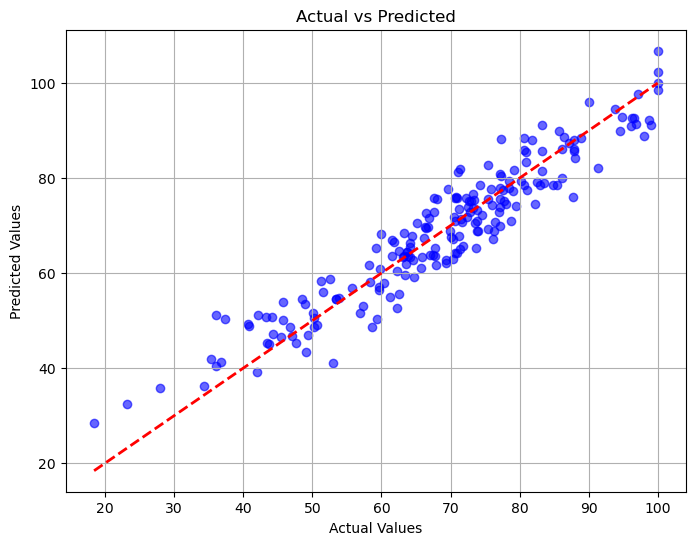

In [133]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()
